In [1]:
#Import packages
import geopandas as gpd
import osmnx as ox
import shapely # spatial analysis

In [2]:
#import shapely.speedups
from shapely import speedups
speedups.enabled

True

In [3]:
#Read in exits feature class as a geodataframe
exits_gdf = gpd.read_file('../Data/MJBA/MJBA_Exits.shp')

In [4]:
exits_gdf

,FID,Exit_ID,Longitude,Latitude,County,State,Highway,Type,AADT,Pop_dens,Comm_1mi,Ports_5mi,Ports_10mi,Ports_20mi,Close_nonT,geometry
0,7059,US-64_Cherokee_NC_Exit_1,-84.314304,35.019492,Cherokee,NC,U.S. Highway 64,Exit/Intersection,3700,60.349790,1,0,0,0,34.094152,POINT (-84.31430 35.01949)
1,7060,US-64_Cherokee_NC_Exit_2,-84.311492,35.014933,Cherokee,NC,U.S. Highway 64,Exit/Intersection,3700,60.349790,1,0,0,0,34.365230,POINT (-84.31149 35.01493)
2,7061,US-64_Cherokee_NC_Exit_3,-84.295528,35.013561,Cherokee,NC,U.S. Highway 64,Exit/Intersection,3900,60.349790,0,0,0,0,35.233979,POINT (-84.29553 35.01356)
3,7062,US-64_Cherokee_NC_Exit_4,-84.280291,35.012880,Cherokee,NC,U.S. Highway 64,Exit/Intersection,3900,60.349790,0,0,0,0,36.048303,POINT (-84.28029 35.01288)
4,7063,US-64_Cherokee_NC_Exit_5,-84.275190,35.017816,Cherokee,NC,U.S. Highway 64,Exit/Intersection,3900,60.349790,0,0,0,0,36.186597,POINT (-84.27519 35.01782)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,8232,I-40_Johnston_NC_Exit_5,-78.518206,35.389884,Johnston,NC,Interstate 40,Exit/Intersection,43000,193.947851,1,0,0,0,28.009339,POINT (-78.51821 35.38988)
1174,8233,US-70_Johnston_NC_Exit_9,-78.289842,35.519484,Johnston,NC,U.S. Highway 70,Exit/Intersection,24000,404.640825,23,0,0,0,24.068087,POINT (-78.28984 35.51948)
1175,8234,I-85_Davidson_NC_Exit_8,-80.181938,35.809700,Davidson,NC,Interstate 85,Exit/Intersection,60000,117.395374,3,0,0,2,18.950338,POINT (-80.18194 35.80970)
1176,8235,I-40_Iredell_NC_Exit_6,-80.831572,35.814640,Iredell,NC,Interstate 40,Exit/Intersection,36000,165.824902,6,0,0,2,19.302607,POINT (-80.83157 35.81464)


In [5]:
exits_gdf.shape

(1178, 16)

In [6]:
#Reveal cordinate reference of the exit features
exits_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
print(exits_gdf.crs)

epsg:4326


In [8]:
#Transform exits to the projected UT ,17N
exits_gdf = exits_gdf.to_crs(32617)
print(exits_gdf.crs)

epsg:32617


In [9]:
exits_gdf['geometry'] 

0       POINT (197578.012 3880227.389)
1       POINT (197817.907 3879713.054)
2       POINT (199270.172 3879512.464)
3       POINT (200658.638 3879391.092)
4       POINT (201142.266 3879923.503)
                     ...              
1173    POINT (725411.781 3919109.433)
1174    POINT (745763.262 3934032.757)
1175    POINT (573907.493 3963150.415)
1176    POINT (515215.435 3963402.749)
1177    POINT (369094.559 3911793.401)
Name: geometry, Length: 1178, dtype: geometry

In [10]:
#Buffer the exits 1 mile (1609.34 m); 
exits_gdf['geometry'] = exits_gdf['geometry'].buffer(1609.34)

In [11]:
exits_gdf['geometry']

0       POLYGON ((199187.352 3880227.389, 199179.602 3...
1       POLYGON ((199427.247 3879713.054, 199419.497 3...
2       POLYGON ((200879.512 3879512.464, 200871.763 3...
3       POLYGON ((202267.978 3879391.092, 202260.229 3...
4       POLYGON ((202751.606 3879923.503, 202743.857 3...
                              ...                        
1173    POLYGON ((727021.121 3919109.433, 727013.371 3...
1174    POLYGON ((747372.602 3934032.757, 747364.852 3...
1175    POLYGON ((575516.833 3963150.415, 575509.083 3...
1176    POLYGON ((516824.775 3963402.749, 516817.026 3...
1177    POLYGON ((370703.899 3911793.401, 370696.150 3...
Name: geometry, Length: 1178, dtype: geometry

In [12]:
#Transform the buffered features to WGS 84
exits_gdf_wgs84 = exits_gdf.to_crs(4326)

In [13]:
#Combine features into a single multipolygon
theSearchArea = exits_gdf_wgs84.unary_union
type(theSearchArea)

shapely.geometry.multipolygon.MultiPolygon

In [14]:
#Extract restaurants in search area 
theAmenities = ox.pois.create_poi_gdf(polygon=theSearchArea,
                                      amenities=['restaurant','cafes'])

In [15]:
#Save the data to a CSV
theAmenities.to_csv('../Data/OSM/Amenities_1mile.csv')

In [16]:
theAmenities['geometry']

266302295                           POINT (-78.91896 36.01642)
300269657                           POINT (-78.91903 36.01573)
315602700                           POINT (-78.92986 35.92007)
315605227                           POINT (-78.92964 35.92044)
368983251                           POINT (-78.91806 36.02307)
                                   ...                        
6002674      MULTIPOLYGON (((-81.70400 35.72992, -81.70407 ...
9045998      MULTIPOLYGON (((-82.53762 35.44451, -82.53762 ...
9046004      MULTIPOLYGON (((-82.53749 35.44505, -82.53748 ...
9046077      MULTIPOLYGON (((-82.53448 35.44572, -82.53449 ...
9046139      MULTIPOLYGON (((-82.53444 35.44604, -82.53441 ...
Name: geometry, Length: 1398, dtype: geometry

In [17]:
#List the unique types of features
theAmenities['geometry'].type.unique()

array(['Point', 'Polygon', 'MultiPolygon'], dtype=object)

In [18]:
#Parse the dataframe to three, based on geometry type
theAmenities_points = theAmenities.loc[theAmenities['geometry'].type == 'Point'].reset_index()
#polys=anything else
theAmenities_polys = theAmenities.loc[theAmenities['geometry'].type != 'Point'].reset_index()

In [19]:
#Change theAmenities_polys to points by taking their centroids
theAmenities_polys['geometry'] = theAmenities_polys['geometry'].centroid

In [20]:
theAmenities_polys['geometry'].type.unique()

array(['Point'], dtype=object)

In [21]:
#Append the three together
import pandas as pd

In [22]:
theAmenities_all = pd.concat([theAmenities_points,theAmenities_polys])
theAmenities_all.shape

(1398, 209)

In [23]:
#Save to a shapefile, selecting only the amenity type as an attribute
theAmenities_all[['amenity','geometry']].to_file('../Data/OSM/OSM_amenities.shp')

In [25]:
theAmenities_all[['amenity','geometry']]

,amenity,geometry
0,restaurant,POINT (-78.91896 36.01642)
1,restaurant,POINT (-78.91903 36.01573)
2,restaurant,POINT (-78.92986 35.92007)
3,restaurant,POINT (-78.92964 35.92044)
4,restaurant,POINT (-78.91806 36.02307)
...,...,...
528,restaurant,POINT (-81.70424 35.72993)
529,restaurant,POINT (-82.53782 35.44455)
530,restaurant,POINT (-82.53754 35.44517)
531,restaurant,POINT (-82.53435 35.44565)


### Count amenities near a feature

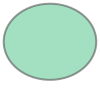

In [27]:
#Get the area around one exit feature (the 56th one, just to grab one I know has amenities)
theArea = exits_gdf_wgs84.at[56,'geometry']
theArea

In [30]:
#Count returns the number of "trues" within this mask
theAmenities_all.within(theArea).sum()

2

In [31]:
#Define a function
def get_amenity_count(theShape):
    return theAmenities_all.within(theShape).sum()

In [32]:
#Apply the function to the get
amenity_count = exits_gdf_wgs84['geometry'].apply(get_amenity_count)

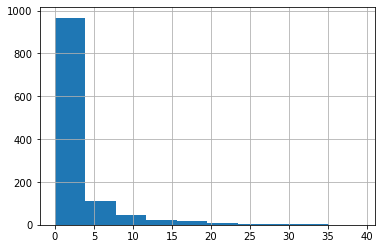

In [33]:
#Plot a histogram of the counts
amenity_count.hist();

In [34]:
#Re-read in the exit features (since we modified them) and attach the amenity count data
exits_gdf = gpd.read_file('../Data/MJBA/MJBA_Exits.shp')
exits_gdf['amenity_n'] = amenity_count
exits_gdf.head()

,FID,Exit_ID,Longitude,Latitude,County,State,Highway,Type,AADT,Pop_dens,Comm_1mi,Ports_5mi,Ports_10mi,Ports_20mi,Close_nonT,geometry,amenity_n
0,7059,US-64_Cherokee_NC_Exit_1,-84.314304,35.019492,Cherokee,NC,U.S. Highway 64,Exit/Intersection,3700,60.34979,1,0,0,0,34.094152,POINT (-84.31430 35.01949),0
1,7060,US-64_Cherokee_NC_Exit_2,-84.311492,35.014933,Cherokee,NC,U.S. Highway 64,Exit/Intersection,3700,60.34979,1,0,0,0,34.365230,POINT (-84.31149 35.01493),0
2,7061,US-64_Cherokee_NC_Exit_3,-84.295528,35.013561,Cherokee,NC,U.S. Highway 64,Exit/Intersection,3900,60.34979,0,0,0,0,35.233979,POINT (-84.29553 35.01356),0
3,7062,US-64_Cherokee_NC_Exit_4,-84.280291,35.012880,Cherokee,NC,U.S. Highway 64,Exit/Intersection,3900,60.34979,0,0,0,0,36.048303,POINT (-84.28029 35.01288),0
4,7063,US-64_Cherokee_NC_Exit_5,-84.275190,35.017816,Cherokee,NC,U.S. Highway 64,Exit/Intersection,3900,60.34979,0,0,0,0,36.186597,POINT (-84.27519 35.01782),0


In [37]:
#save the exits to a new feature class
exits_gdf.to_file('../Data/Processed/exits_amenities.shp')

In [38]:
#Import contextily 
import contextily as ctx

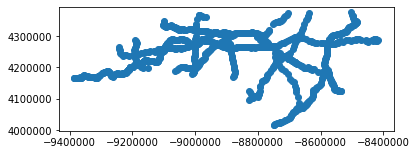

In [42]:
#Transform to web mercator (to match contextily base maps)
exits_gdf_wm = exits_gdf.to_crs(3857)
exits_gdf_wm.plot()

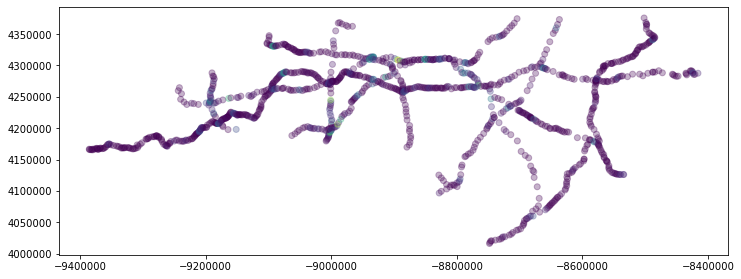

In [43]:
#draft
exits_gdf_wm.plot('amenity_n',
                  alpha=0.3,
                  figsize=(12,6))

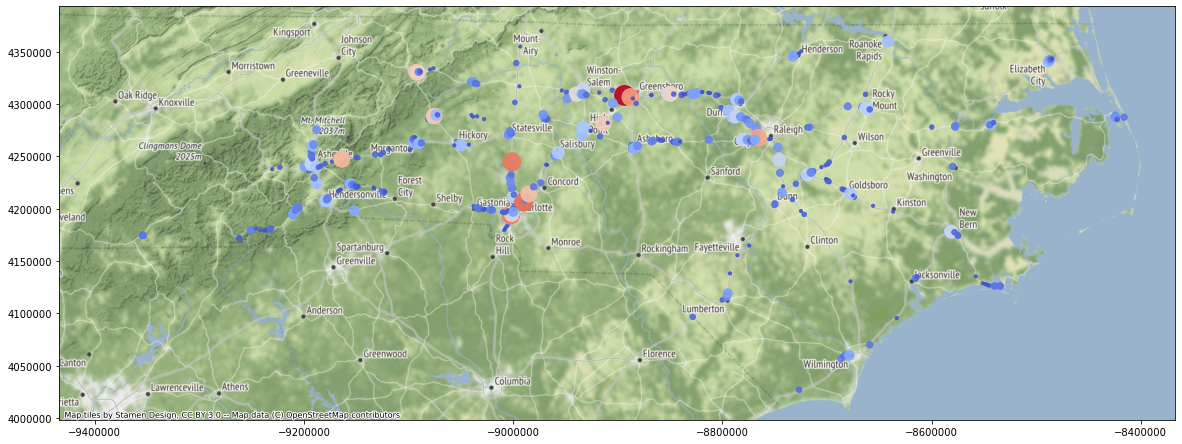

In [40]:
#Plot the amenities to an axis called 'ax'
ax =exits_gdf_wm.plot('amenity_n',
                      cmap='coolwarm',
                      markersize= exits_gdf['amenity_n']*10,
                      alpha=0.9,
                      figsize=(20,10));
# Add basemap
ctx.add_basemap(ax)

In [45]:
#import matplotlib.pyplot as plt
import mplleaflet

In [47]:
#Plot the amenities to an axis called 'ax'
ax =exits_gdf.to_crs(4326).plot('amenity_n',
                      cmap='coolwarm',
                      markersize= exits_gdf['amenity_n']*10,
                      alpha=0.9,
                      figsize=(20,10));
# 2. Convert plot to a web map and show in a new page
mplleaflet.show(fig=ax.figure)